In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
# Save path to variable
climate_path = "CA042239T.csv"

# Read the climate data
climate_results = pd.read_csv(climate_path)

climate_results 

,State_id,YEAR,Month,TMAX (F),TMEAN (F),TMIN (F)
0,'042239',1887,1,.,.,.
1,'042239',1887,2,.,.,.
2,'042239',1887,3,.,.,.
3,'042239',1887,4,.,.,.
4,'042239',1887,5,.,.,.
...,...,...,...,...,...,...
1531,'042239',2014,8,83.2,68.3,53.4
1532,'042239',2014,9,82.5,66.7,50.8
1533,'042239',2014,10,75.4,58.6,41.8
1534,'042239',2014,11,62.3,49.1,35.8


In [3]:
# Checking for NAs
climate_results.isna().sum() 

State_id      0
YEAR          0
Month         0
TMAX (F)      0
TMEAN (F)     0
TMIN (F)      0
dtype: int64

In [4]:
# Checking data types
climate_results.dtypes

State_id      object
YEAR           int64
Month          int64
TMAX (F)      object
TMEAN (F)     object
TMIN (F)      object
dtype: object

In [5]:
# Checking columns
climate_results.columns

Index(['State_id  ', 'YEAR  ', 'Month  ', 'TMAX (F)', 'TMEAN (F)',
       'TMIN (F) '],
      dtype='object')

In [6]:
# Revising extra spaces out of column names
dict = {'State_id  ': 'State_id',
        'YEAR  ': 'YEAR',
        'Month  ': 'Month',
        'TMIN (F) ': 'TMIN (F)'}

climate_redux = climate_results.rename(columns=dict)
climate_redux.columns

Index(['State_id', 'YEAR', 'Month', 'TMAX (F)', 'TMEAN (F)', 'TMIN (F)'], dtype='object')

In [9]:
# Grabbing data between years 1961 - 1990
climate_results_sixtyone = climate_redux[climate_redux['YEAR'].between(1961, 1990)]
climate_results_sixtyone

,State_id,YEAR,Month,TMAX (F),TMEAN (F),TMIN (F)
888,'042239',1961,1,53.8,40.2,26.7
889,'042239',1961,2,55.7,42.2,28.8
890,'042239',1961,3,53,42.4,31.7
891,'042239',1961,4,64.3,49.7,35
892,'042239',1961,5,64.2,50.8,37.4
...,...,...,...,...,...,...
1243,'042239',1990,8,81.9,67,52
1244,'042239',1990,9,79.6,64.3,48.9
1245,'042239',1990,10,73.7,56.2,38.7
1246,'042239',1990,11,58.9,45.9,32.8


In [10]:
# Using .loc as alternate method
sixtyone = climate_redux.loc[(climate_redux.YEAR > 1960) & (climate_redux.YEAR < 1991), :]
sixtyone

,State_id,YEAR,Month,TMAX (F),TMEAN (F),TMIN (F)
888,'042239',1961,1,53.8,40.2,26.7
889,'042239',1961,2,55.7,42.2,28.8
890,'042239',1961,3,53,42.4,31.7
891,'042239',1961,4,64.3,49.7,35
892,'042239',1961,5,64.2,50.8,37.4
...,...,...,...,...,...,...
1243,'042239',1990,8,81.9,67,52
1244,'042239',1990,9,79.6,64.3,48.9
1245,'042239',1990,10,73.7,56.2,38.7
1246,'042239',1990,11,58.9,45.9,32.8


In [11]:
# Adjust TMAX format to float
import warnings
warnings.filterwarnings("ignore")
sixtyone['TMAX (F)'] = sixtyone['TMAX (F)'].astype('float')

# Adjust TMEAN format to float
sixtyone['TMEAN (F)'] = sixtyone['TMEAN (F)'].astype('float')

# Adjust TMIN format to float
sixtyone['TMIN (F)'] = sixtyone['TMIN (F)'].astype('float')
sixtyone.dtypes

State_id      object
YEAR           int64
Month          int64
TMAX (F)     float64
TMEAN (F)    float64
TMIN (F)     float64
dtype: object

In [12]:
# Creating first pivot table for TMAX - 2.5a
pivot_tmax = sixtyone.pivot_table(values='TMAX (F)', index='YEAR', columns='Month')
pivot_tmax

Month,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
1961,53.8,55.7,53.0,64.3,64.2,81.3,87.6,85.0,76.3,69.3,54.0,48.9
1962,48.2,47.0,46.7,68.3,63.6,74.9,83.8,88.1,82.5,70.6,64.3,54.9
1963,46.1,61.8,53.7,55.0,68.3,70.6,85.7,83.3,80.1,70.1,58.5,54.4
1964,48.7,52.2,49.7,55.6,62.3,74.9,86.8,85.3,80.4,75.3,51.9,50.8
1965,50.7,52.4,49.9,56.7,66.6,69.8,84.4,84.9,73.3,76.8,59.1,46.9
1966,46.9,46.2,58.7,66.5,72.5,78.4,84.7,86.6,80.5,69.6,58.9,50.2
1967,51.0,55.0,54.2,47.8,65.0,70.9,86.6,86.5,74.8,74.4,61.4,43.3
1968,47.6,57.0,55.7,59.5,67.6,76.0,83.8,78.9,78.9,69.4,58.6,47.0
1969,50.8,44.0,52.6,61.7,69.5,73.8,83.4,89.3,81.4,65.6,57.0,58.1


In [13]:
# Creating second pivot table for TMIN - 2.5b
pivot_tmin = sixtyone.pivot_table(values='TMIN (F)', index='YEAR', columns='Month')
pivot_tmin

Month,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
1961,26.7,28.8,31.7,35.0,37.4,52.4,54.6,53.2,41.4,36.7,28.7,27.3
1962,27.1,30.4,27.1,39.0,38.3,44.3,50.1,53.5,45.8,35.6,28.5,25.5
1963,24.9,33.7,28.4,29.4,39.8,44.2,53.2,52.8,46.7,40.1,32.5,24.8
1964,25.8,24.4,25.3,31.0,37.3,43.1,52.4,52.4,43.1,42.9,27.8,32.0
1965,30.0,28.4,28.6,33.3,37.8,39.6,50.8,52.1,40.4,38.6,33.3,29.0
1966,25.4,25.9,31.6,37.0,39.9,45.2,52.0,53.8,45.9,37.5,32.6,31.7
1967,30.2,29.9,32.9,28.2,39.4,42.2,54.3,55.1,48.7,36.1,32.6,23.3
1968,27.1,34.8,31.3,31.9,38.6,47.6,54.2,49.8,45.7,37.4,31.4,23.4
1969,31.6,28.4,29.2,38.0,37.0,44.5,52.7,55.0,49.5,35.1,36.2,26.6


In [14]:
# Creating third pivot table for TMEAN - 2.5c
pivot_tmean = sixtyone.pivot_table(values='TMEAN (F)', index='YEAR', columns='Month')
pivot_tmean

Month,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
1961,40.2,42.2,42.4,49.7,50.8,66.8,71.1,69.1,58.9,53.0,41.4,38.1
1962,37.6,38.7,36.9,53.7,51.0,59.6,67.0,70.8,64.1,53.1,46.4,40.2
1963,35.5,47.8,41.0,42.2,54.1,57.4,69.5,68.1,63.4,55.1,45.5,39.6
1964,37.2,38.3,37.5,43.3,49.8,59.0,69.6,68.8,61.8,59.1,39.8,41.4
1965,40.4,40.4,39.2,45.0,52.2,54.7,67.6,68.5,56.9,57.7,46.2,38.0
1966,36.2,36.1,45.1,51.8,56.2,61.8,68.4,70.2,63.2,53.5,45.8,40.9
1967,40.6,42.4,43.6,38.0,52.2,56.6,70.5,70.8,61.7,55.3,47.0,33.3
1968,37.3,45.9,43.5,45.7,53.1,61.8,69.0,64.3,62.3,53.4,45.0,35.2
1969,41.2,36.2,40.9,49.8,53.3,59.2,68.1,72.2,65.5,50.4,46.6,42.3


In [15]:
# Calculate August climatology of TMAX - 2.6a
pivot_tmax[8].mean()

83.55

In [16]:
# Calculate August climatology of TMIN - 2.6a
pivot_tmin[8].mean()

52.959999999999994

In [17]:
# Calculate August climatology of TMEAN - 2.6a
pivot_tmean[8].mean()

68.25333333333333

In [18]:
# Compute January standard deviation of TMAX - 2.6b
pivot_tmax[1].std()

3.326355915737358

In [19]:
# Compute January standard deviation of TMIN - 2.6b
pivot_tmin[1].std()

2.7185696036068627

In [20]:
# Compute January standard deviation of TMEAN - 2.6b
pivot_tmean[1].std()

2.5760278609187997

In [21]:
# Grabbing data for 1951 to 2010 - 2.7a
fiftyone = climate_redux.loc[(climate_redux.YEAR > 1950) & (climate_redux.YEAR < 2011), :]

# Grabbing data for 1961 to 2010 - 2.7bii
sixtyone = climate_redux.loc[(climate_redux.YEAR > 1960) & (climate_redux.YEAR < 2011), :]

# Grabbing data for 1971 to 2010 - 2.7biii
seventyone = climate_redux.loc[(climate_redux.YEAR > 1970) & (climate_redux.YEAR < 2011), :]

# Grabbing data for 1981 to 2010 - 2.7biv
eightyone = climate_redux.loc[(climate_redux.YEAR > 1980) & (climate_redux.YEAR < 2011), :]


fiftyone

,State_id,YEAR,Month,TMAX (F),TMEAN (F),TMIN (F)
768,'042239',1951,1,48,37.7,27.4
769,'042239',1951,2,49.3,39.1,29
770,'042239',1951,3,53,42.4,31.8
771,'042239',1951,4,56.7,46.3,36
772,'042239',1951,5,66,54.1,42.2
...,...,...,...,...,...,...
1483,'042239',2010,8,84,69.2,54.3
1484,'042239',2010,9,82.5,64.2,45.8
1485,'042239',2010,10,66.5,54,41.6
1486,'042239',2010,11,55.8,43.9,32


In [39]:
# Adjust TMAX, TMEAN and TMIN formats to float for all four time ranges ranges 2.7a and b
fiftyone['TMAX (F)'] = fiftyone['TMAX (F)'].astype('float')
fiftyone['TMEAN (F)'] = fiftyone['TMEAN (F)'].astype('float')
fiftyone['TMIN (F)'] = fiftyone['TMIN (F)'].astype('float')

sixtyone['TMAX (F)'] = sixtyone['TMAX (F)'].astype('float')
sixtyone['TMEAN (F)'] = sixtyone['TMEAN (F)'].astype('float')
sixtyone['TMIN (F)'] = sixtyone['TMIN (F)'].astype('float')

seventyone['TMAX (F)'] = seventyone['TMAX (F)'].astype('float')
seventyone['TMEAN (F)'] = seventyone['TMEAN (F)'].astype('float')
seventyone['TMIN (F)'] = seventyone['TMIN (F)'].astype('float')

eightyone['TMAX (F)'] = eightyone['TMAX (F)'].astype('float')
eightyone['TMEAN (F)'] = eightyone['TMEAN (F)'].astype('float')
eightyone['TMIN (F)'] = eightyone['TMIN (F)'].astype('float')



fiftyone.dtypes

State_id      object
YEAR           int64
Month          int64
TMAX (F)     float64
TMEAN (F)    float64
TMIN (F)     float64
dtype: object

In [41]:
# Creating pivot tables for all four time ranges ranges 2.7a and b
pivot_tmin_fiftyone = fiftyone.pivot_table(values='TMIN (F)', index='YEAR', columns='Month')

pivot_tmin_sixtyone = sixtyone.pivot_table(values='TMIN (F)', index='YEAR', columns='Month')

pivot_tmin_seventyone = seventyone.pivot_table(values='TMIN (F)', index='YEAR', columns='Month')

pivot_tmin_eightyone = eightyone.pivot_table(values='TMIN (F)', index='YEAR', columns='Month')

pivot_tmin_fiftyone

Month,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
1951,27.4,29.0,31.8,36.0,42.2,43.3,56.5,48.1,46.1,37.9,31.7,26.9
1952,27.9,30.2,28.6,34.8,45.6,43.4,51.9,54.3,48.9,39.7,28.8,26.8
1953,33.7,27.2,30.1,33.1,34.6,45.9,57.5,50.4,44.8,37.7,34.8,29.2
1954,25.9,31.5,29.6,39.1,39.9,45.8,56.1,47.4,48.4,37.4,32.9,27.2
1955,21.6,26.8,32.0,32.8,37.4,44.7,49.5,53.0,44.6,39.5,32.2,32.1
1956,29.8,25.2,30.8,32.1,39.2,47.1,53.1,47.6,49.0,33.5,31.9,29.9
1957,29.8,32.4,34.2,33.8,37.9,49.6,54.9,52.9,46.6,38.9,29.5,30.1
1958,29.2,33.3,29.7,37.0,46.3,49.5,53.5,53.9,50.1,38.8,29.1,30.3
1959,28.4,26.1,33.6,37.6,38.2,48.6,58.6,51.2,48.3,38.4,35.7,31.5


In [42]:
# Checking data
pivot_tmin_fiftyone[1]

YEAR
1951    27.4
1952    27.9
1953    33.7
1954    25.9
1955    21.6
1956    29.8
1957    29.8
1958    29.2
1959    28.4
1960    21.0
1961    26.7
1962    27.1
1963    24.9
1964    25.8
1965    30.0
1966    25.4
1967    30.2
1968    27.1
1969    31.6
1970    28.6
1971    25.4
1972    24.2
1973    24.9
1974    27.2
1975    27.9
1976    27.0
1977    29.6
1978    31.6
1979    26.6
1980    34.6
1981    31.6
1982    28.3
1983    30.6
1984    32.9
1985    29.6
1986    33.4
1987    26.7
1988    28.5
1989    26.6
1990    28.0
1991    29.1
1992    28.6
1993    31.1
1994    30.1
1995    25.9
1996    30.9
1997    34.3
1998    31.0
1999    31.3
2000    30.9
2001    27.4
2002    26.0
2003    33.5
2004    28.5
2005    32.4
2006    29.4
2007    26.0
2008    29.8
2009    32.8
2010    30.9
Name: 1, dtype: float64

In [43]:
# Checking index
pivot_tmin_fiftyone.index

Int64Index([1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
            1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
            1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
            1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
            1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
            2006, 2007, 2008, 2009, 2010],
           dtype='int64', name='YEAR')

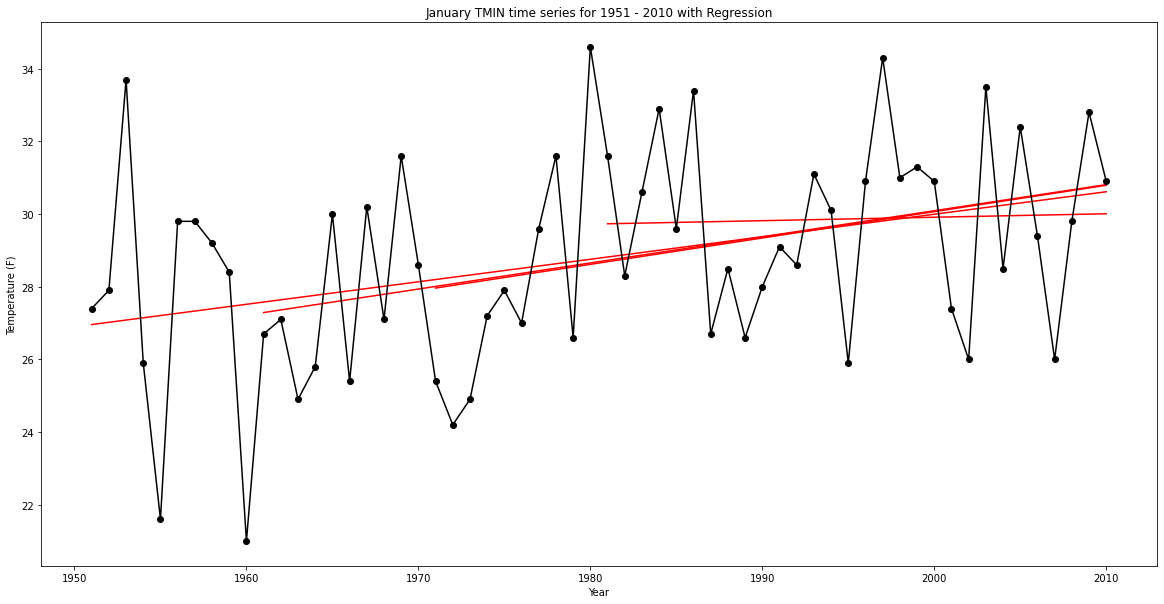

In [46]:
# 2.7a and b - P.D. Jones plot with regression 1880 - 2015
# Sourced from Global Monthly and Annual Temperature Anomalies (degrees C), 1850-2015 
# (Relative to the 1961-1990 Mean)
from sklearn.linear_model import LinearRegression

# 2.7a and bi
t = np.linspace(1951, 2010, 60)
T = pivot_tmin_fiftyone[1]
lm = LinearRegression()
lm.fit(t.reshape(-1,1), T)
predictions = lm.predict(t.reshape(-1, 1))

# 2.7bii
pdj2 = np.linspace(1961, 2010, 50)
PDJ2 = pivot_tmin_sixtyone[1]
lm = LinearRegression()
lm.fit(pdj2.reshape(-1,1), PDJ2)
predictions_pdj2 = lm.predict(pdj2.reshape(-1, 1))

# 2.7biii
pdj3 = np.linspace(1971, 2010, 40)
PDJ3 = pivot_tmin_seventyone[1]
lm = LinearRegression()
lm.fit(pdj3.reshape(-1,1), PDJ3)
predictions_pdj3 = lm.predict(pdj3.reshape(-1, 1))

# 2.7biv
pdj4 = np.linspace(1981, 2010, 30)
PDJ4 = pivot_tmin_eightyone[1]
lm = LinearRegression()
lm.fit(pdj4.reshape(-1,1), PDJ4)
predictions_pdj4 = lm.predict(pdj4.reshape(-1, 1))



plt.figure(figsize=(20,10))
plt.plot(t, predictions, '-r') #regression of 1951 - 2010
plt.plot(pdj2, predictions_pdj2, '-r') #adding regression of 1961 - 2010
plt.plot(pdj3, predictions_pdj3, '-r') #adding regression of 1971 - 2010
plt.plot(pdj4, predictions_pdj4, '-r') #adding regression of 1981 - 2010
plt.plot(t,T,"-o", color="black")
plt.title("January TMIN time series for 1951 - 2010 with Regression")
plt.xlabel("Year")
plt.ylabel("Temperature (F)")
plt.show()  

In [28]:
# Starting 2.8

# Save path to variable
jones_path = "JonesGlobalT.csv"

# Read the climate data
jones_results = pd.read_csv(jones_path)

jones_results 

,Unnamed: 0,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,1,1850,-0.702,-0.284,-0.732,-0.570,-0.325,-0.213,-0.128,-0.233,-0.444,-0.452,-0.190,-0.268,-0.375
1,2,1851,-0.303,-0.362,-0.485,-0.445,-0.302,-0.189,-0.215,-0.153,-0.108,-0.063,-0.030,-0.067,-0.223
2,3,1852,-0.308,-0.477,-0.505,-0.559,-0.209,-0.038,-0.016,-0.195,-0.125,-0.216,-0.187,0.083,-0.224
3,4,1853,-0.177,-0.330,-0.318,-0.352,-0.268,-0.179,-0.059,-0.148,-0.409,-0.359,-0.256,-0.444,-0.271
4,5,1854,-0.360,-0.280,-0.284,-0.349,-0.230,-0.215,-0.228,-0.163,-0.115,-0.188,-0.369,-0.232,-0.246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,162,2011,0.313,0.327,0.425,0.480,0.384,0.489,0.510,0.488,0.454,0.453,0.347,0.401,0.422
162,163,2012,0.306,0.302,0.358,0.575,0.574,0.557,0.510,0.536,0.553,0.556,0.554,0.275,0.470
163,164,2013,0.450,0.486,0.401,0.439,0.520,0.487,0.514,0.533,0.535,0.497,0.639,0.508,0.499
164,165,2014,0.523,0.313,0.561,0.657,0.599,0.618,0.541,0.666,0.589,0.626,0.489,0.634,0.567


In [29]:
# Checking nulls and data types
jones_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  166 non-null    int64  
 1   YEAR        166 non-null    int64  
 2   JAN         166 non-null    float64
 3   FEB         166 non-null    float64
 4   MAR         166 non-null    float64
 5   APR         166 non-null    float64
 6   MAY         166 non-null    float64
 7   JUN         166 non-null    float64
 8   JUL         166 non-null    float64
 9   AUG         166 non-null    float64
 10  SEP         166 non-null    float64
 11  OCT         166 non-null    float64
 12  NOV         166 non-null    float64
 13  DEC         166 non-null    float64
 14  ANNUAL      166 non-null    float64
dtypes: float64(13), int64(2)
memory usage: 19.6 KB


In [30]:
# Checking columns
jones_results.columns

Index(['Unnamed: 0', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL'],
      dtype='object')

In [31]:
# Grabbing date range 1880 - 2015 for 2.8a and b
jones_eighty = jones_results.loc[(jones_results.YEAR > 1879) & (jones_results.YEAR < 2016), :]
jones_eighty

,Unnamed: 0,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
30,31,1880,-0.064,-0.176,-0.105,-0.147,-0.241,-0.308,-0.250,-0.115,-0.233,-0.387,-0.408,-0.295,-0.229
31,32,1881,-0.362,-0.238,-0.187,-0.133,-0.030,-0.229,-0.151,-0.128,-0.244,-0.284,-0.341,-0.138,-0.206
32,33,1882,0.114,-0.009,-0.053,-0.283,-0.373,-0.317,-0.185,-0.221,-0.155,-0.337,-0.313,-0.463,-0.215
33,34,1883,-0.409,-0.322,-0.342,-0.394,-0.253,-0.119,-0.195,-0.209,-0.278,-0.381,-0.305,-0.324,-0.295
34,35,1884,-0.418,-0.217,-0.459,-0.529,-0.392,-0.413,-0.424,-0.410,-0.342,-0.322,-0.558,-0.416,-0.408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,162,2011,0.313,0.327,0.425,0.480,0.384,0.489,0.510,0.488,0.454,0.453,0.347,0.401,0.422
162,163,2012,0.306,0.302,0.358,0.575,0.574,0.557,0.510,0.536,0.553,0.556,0.554,0.275,0.470
163,164,2013,0.450,0.486,0.401,0.439,0.520,0.487,0.514,0.533,0.535,0.497,0.639,0.508,0.499
164,165,2014,0.523,0.313,0.561,0.657,0.599,0.618,0.541,0.666,0.589,0.626,0.489,0.634,0.567


In [32]:
# Grabbing date range 1900 - 1999 for 2.8c
jones_zeros = jones_results.loc[(jones_results.YEAR > 1899) & (jones_results.YEAR < 2000), :]
jones_zeros

,Unnamed: 0,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
50,51,1900,-0.246,-0.164,-0.276,-0.252,-0.276,-0.184,-0.193,-0.184,-0.223,-0.060,-0.262,-0.087,-0.200
51,52,1901,-0.182,-0.270,-0.246,-0.193,-0.197,-0.159,-0.194,-0.199,-0.349,-0.298,-0.446,-0.442,-0.265
52,53,1902,-0.239,-0.270,-0.393,-0.449,-0.405,-0.449,-0.392,-0.369,-0.370,-0.486,-0.534,-0.524,-0.407
53,54,1903,-0.274,-0.204,-0.355,-0.472,-0.464,-0.551,-0.496,-0.593,-0.528,-0.658,-0.627,-0.604,-0.485
54,55,1904,-0.641,-0.603,-0.659,-0.553,-0.538,-0.526,-0.530,-0.483,-0.485,-0.480,-0.386,-0.417,-0.526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,1995,0.419,0.595,0.325,0.284,0.216,0.308,0.327,0.354,0.252,0.329,0.322,0.127,0.321
146,147,1996,0.115,0.323,0.186,0.130,0.216,0.170,0.221,0.205,0.099,0.135,0.149,0.234,0.182
147,148,1997,0.206,0.318,0.347,0.273,0.286,0.402,0.366,0.438,0.475,0.554,0.498,0.505,0.389
148,149,1998,0.483,0.763,0.558,0.636,0.573,0.592,0.672,0.603,0.392,0.404,0.295,0.473,0.536


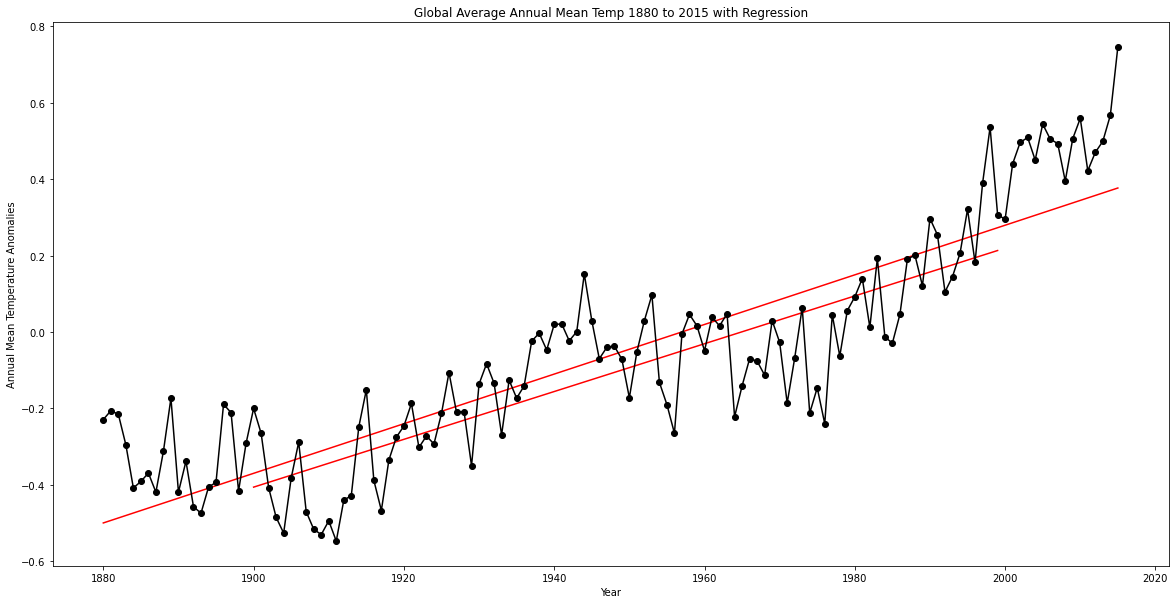

In [33]:
# 2.8a, b and c - P.D. Jones plot with regression 1880 - 2015
# Sourced from Global Monthly and Annual Temperature Anomalies (degrees C), 1850-2015 
# (Relative to the 1961-1990 Mean)


# 2.8a and b
tii = np.linspace(1880, 2015, 136)
Tii = jones_eighty['ANNUAL']
lm = LinearRegression()
lm.fit(tii.reshape(-1,1), Tii)
predictions_two = lm.predict(tii.reshape(-1, 1))

# 2.8c - P.D. Jones plot with regression 1900 - 1999
too = np.linspace(1900, 1999, 100)
Too = jones_zeros['ANNUAL']
lm = LinearRegression()
lm.fit(too.reshape(-1,1), Too)
predictions_three = lm.predict(too.reshape(-1, 1))


plt.figure(figsize=(20,10))
plt.plot(tii, predictions_two, '-r') #regression of 1880 - 2015
plt.plot(too, predictions_three, '-r') #adding regression of 1900 - 1999
plt.plot(tii,Tii,"-o", color="black")
plt.title("Global Average Annual Mean Temp 1880 to 2015 with Regression")
plt.xlabel("Year")
plt.ylabel("Annual Mean Temperature Anomalies")
plt.show()  

In [34]:
tii

array([1880., 1881., 1882., 1883., 1884., 1885., 1886., 1887., 1888.,
       1889., 1890., 1891., 1892., 1893., 1894., 1895., 1896., 1897.,
       1898., 1899., 1900., 1901., 1902., 1903., 1904., 1905., 1906.,
       1907., 1908., 1909., 1910., 1911., 1912., 1913., 1914., 1915.,
       1916., 1917., 1918., 1919., 1920., 1921., 1922., 1923., 1924.,
       1925., 1926., 1927., 1928., 1929., 1930., 1931., 1932., 1933.,
       1934., 1935., 1936., 1937., 1938., 1939., 1940., 1941., 1942.,
       1943., 1944., 1945., 1946., 1947., 1948., 1949., 1950., 1951.,
       1952., 1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960.,
       1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969.,
       1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978.,
       1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987.,
       1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
       1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
       2006., 2007.,

In [35]:
# Starting 2.9

# Save path to variable
NOAA_path = "NOAAGlobalT.csv"

# Read the climate data
NOAA_results = pd.read_csv(NOAA_path)

NOAA_results 

,Unnamed: 0,LAT,LON,1880-1,1880-2,1880-3,1880-4,1880-5,1880-6,1880-7,...,2016-4,2016-5,2016-6,2016-7,2016-8,2016-9,2016-10,2016-11,2016-12,2017-1
0,1,-87.5,2.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9
1,2,-87.5,7.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9
2,3,-87.5,12.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9
3,4,-87.5,17.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9
4,5,-87.5,22.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,2588,87.5,337.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9
2588,2589,87.5,342.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9
2589,2590,87.5,347.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9
2590,2591,87.5,352.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9


In [36]:
# Checking info
NOAA_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Columns: 1648 entries, Unnamed: 0 to 2017-1
dtypes: float64(1647), int64(1)
memory usage: 32.6 MB


In [37]:
# Checking NAs
NOAA_results.isna().sum()

Unnamed: 0    0
LAT           0
LON           0
1880-1        0
1880-2        0
             ..
2016-9        0
2016-10       0
2016-11       0
2016-12       0
2017-1        0
Length: 1648, dtype: int64

In [220]:
# Grabbing first lat-lon grid box
noaa = pd.DataFrame(NOAA_results.iloc[1599])
noaa

,1599
Unnamed: 0,1600.0000
LAT,22.5000
LON,77.5000
1880-1,-0.4490
1880-2,-1.1303
...,...
2016-9,0.4361
2016-10,-0.1235
2016-11,0.0931
2016-12,1.0288


In [77]:
# Grabbing second lat-lon grid box
noaa2 = pd.DataFrame(NOAA_results.iloc[1786])
noaa2

,1786
Unnamed: 0,1787.0000
LAT,32.5000
LON,292.5000
1880-1,1.7832
1880-2,1.5026
...,...
2016-9,1.9494
2016-10,1.1678
2016-11,0.5340
2016-12,0.9324


In [79]:
# Checking slice and length
noaa2[1786][3:1647]

1880-1     1.7832
1880-2     1.5026
1880-3     1.2178
1880-4     0.9177
1880-5     0.5274
            ...  
2016-8     1.8600
2016-9     1.9494
2016-10    1.1678
2016-11    0.5340
2016-12    0.9324
Name: 1786, Length: 1644, dtype: float64

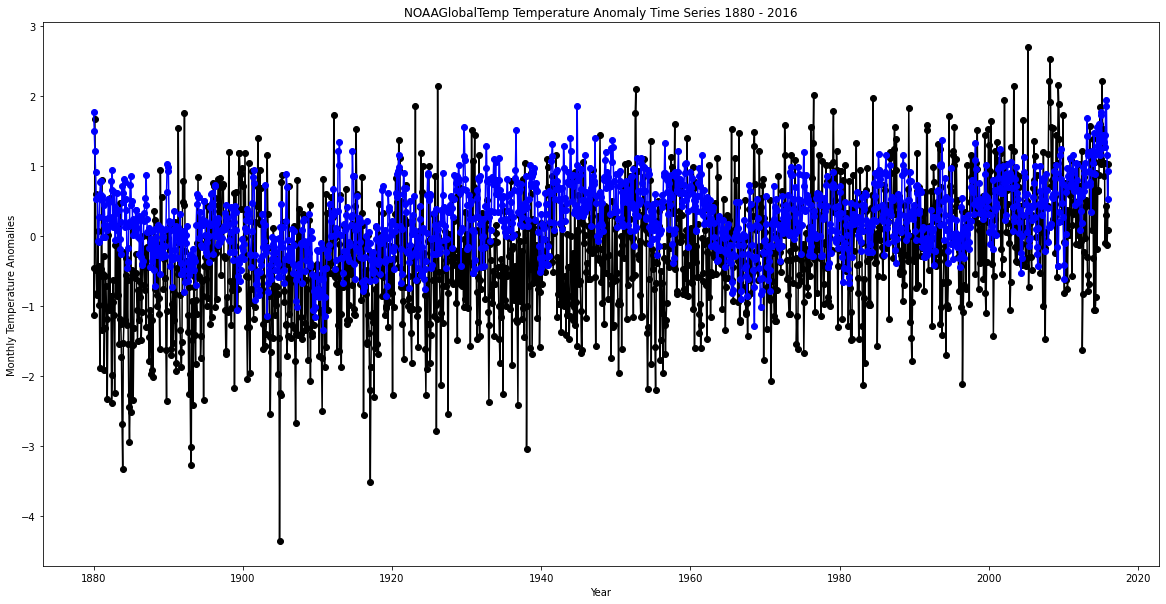

In [86]:
# 2.9 Plot the NOAAGlobalTemp temperature anomaly time series of two lat-lon grid boxes

# Creating variables for 1599
noaa_x = np.linspace(1880, 2016, 1644)
noaa_y = noaa[1599][3:1647]

# Creating variables for 1786
noaa_X = np.linspace(1880, 2016, 1644)
noaa_Y = noaa2[1786][3:1647]

plt.figure(figsize=(20,10))
plt.plot(noaa_x,noaa_y,"-o", color="black")
plt.plot(noaa_X,noaa_Y,"-o", color="blue")

plt.title("NOAAGlobalTemp Temperature Anomaly Time Series 1880 - 2016")
plt.xlabel("Year")
plt.ylabel("Monthly Temperature Anomalies")
plt.show() 

In [230]:
# Starting 2.10
# Grabbing lat-lon grid boxes for Texas
# noaa_TX1 = pd.DataFrame(NOAA_results.iloc[1747])
# noaa_TX2 = pd.DataFrame(NOAA_results.iloc[1748])
# noaa_TX1

In [229]:
# Starting 2.11
# Storing NOAA_results column values in a data frame
NOAA_columns = pd.DataFrame(NOAA_results.columns.values)
dict = {0: 'Date'}
NOAA_columns = NOAA_columns.rename(columns=dict)

# Storing NOAA_results row values in a data frame for San Diego
NOAA_rows = pd.DataFrame(NOAA_results.iloc[1751].values)
dict_rows = {0: 'Temp Anomalies'}
NOAA_rows = NOAA_rows.rename(columns=dict_rows)



noaa_SD = pd.concat([NOAA_columns, NOAA_rows], axis=1)
noaa_SD


# # Grabbing lat-lon grid boxes for San Diego, USA and Edmonton, Canada
# noaa_SD = pd.DataFrame(NOAA_results.iloc[1751])
# noaa_EDM = pd.DataFrame(NOAA_results.iloc[2038])
# noaa_SD

,Date,Temp Anomalies
0,Unnamed: 0,1752.0000
1,LAT,32.5000
2,LON,117.5000
3,1880-1,-0.5021
4,1880-2,-999.9000
...,...,...
1643,2016-9,1.7279
1644,2016-10,0.6448
1645,2016-11,0.3373
1646,2016-12,2.1073


In [205]:
# Storing NOAA_results column values in a data frame
NOAA_columns = pd.DataFrame(NOAA_results.columns.values)
dict = {0: 'Date'}
NOAA_columns = NOAA_columns.rename(columns=dict)

# Storing NOAA_results row values in a data frame for Edmonton, Canada
NOAA_rows_EDM = pd.DataFrame(NOAA_results.iloc[2038].values)
dict_rows_EDM = {0: 'Temp Anomalies'}
NOAA_rows_EDM = NOAA_rows_EDM.rename(columns=dict_rows_EDM)


noaa_EDM = pd.concat([NOAA_columns, NOAA_rows_EDM], axis=1)
noaa_EDM

,Date,Temp Anomalies
0,Unnamed: 0,2039.0000
1,LAT,52.5000
2,LON,112.5000
3,1880-1,-999.9000
4,1880-2,-999.9000
...,...,...
1643,2016-9,2.2397
1644,2016-10,-3.5613
1645,2016-11,-3.2856
1646,2016-12,1.9820


In [206]:
# Dropping first three rows
noaa_SD = noaa_SD.drop([0,1,2])

noaa_EDM = noaa_EDM.drop([0,1,2])

noaa_SD

,Date,Temp Anomalies
3,1880-1,-0.5021
4,1880-2,-999.9000
5,1880-3,-0.9298
6,1880-4,-0.8578
7,1880-5,-0.9554
...,...,...
1643,2016-9,1.7279
1644,2016-10,0.6448
1645,2016-11,0.3373
1646,2016-12,2.1073


In [207]:
# Reset index
noaa_SD = noaa_SD.reset_index(drop=True)

noaa_EDM = noaa_EDM.reset_index(drop=True)

noaa_SD

,Date,Temp Anomalies
0,1880-1,-0.5021
1,1880-2,-999.9000
2,1880-3,-0.9298
3,1880-4,-0.8578
4,1880-5,-0.9554
...,...,...
1640,2016-9,1.7279
1641,2016-10,0.6448
1642,2016-11,0.3373
1643,2016-12,2.1073


In [208]:
# Splitting Date column into Month and Year
noaa_SD['Year'] = pd.DatetimeIndex(noaa_SD['Date']).year

noaa_SD['Month'] = pd.DatetimeIndex(noaa_SD['Date']).month



noaa_EDM['Year'] = pd.DatetimeIndex(noaa_EDM['Date']).year

noaa_EDM['Month'] = pd.DatetimeIndex(noaa_EDM['Date']).month

noaa_SD

,Date,Temp Anomalies,Year,Month
0,1880-1,-0.5021,1880,1
1,1880-2,-999.9000,1880,2
2,1880-3,-0.9298,1880,3
3,1880-4,-0.8578,1880,4
4,1880-5,-0.9554,1880,5
...,...,...,...,...
1640,2016-9,1.7279,2016,9
1641,2016-10,0.6448,2016,10
1642,2016-11,0.3373,2016,11
1643,2016-12,2.1073,2016,12


In [209]:
# Grabbing date range 1981 - 2010 for 2.11
noaa_SD_81 = noaa_SD.loc[(noaa_SD.Year > 1980) & (noaa_SD.Year < 2011), :]

noaa_EDM_81 = noaa_EDM.loc[(noaa_EDM.Year > 1980) & (noaa_EDM.Year < 2011), :]

noaa_SD_81

,Date,Temp Anomalies,Year,Month
1212,1981-1,-1.5311,1981,1
1213,1981-2,-0.0294,1981,2
1214,1981-3,1.7182,1981,3
1215,1981-4,-0.0276,1981,4
1216,1981-5,0.2747,1981,5
...,...,...,...,...
1567,2010-8,0.8647,2010,8
1568,2010-9,1.0424,2010,9
1569,2010-10,0.4654,2010,10
1570,2010-11,0.8634,2010,11


In [210]:
# Creating pivot table for 1981 to 2010 for 2.11
pivot_SD = noaa_SD_81.pivot_table(values='Temp Anomalies', index='Year', columns='Month')

pivot_EDM = noaa_EDM_81.pivot_table(values='Temp Anomalies', index='Year', columns='Month')

pivot_SD

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1981,-1.5311,-0.0294,1.7182,-0.0276,0.2747,0.0573,0.7534,0.0258,-0.8374,-2.3689,-2.0089,-1.0490
1982,0.3302,-0.3262,-0.1465,-0.8884,1.7213,-0.5099,-1.3705,-0.9488,-1.1795,1.3052,0.6310,-0.6190
1983,0.0189,-0.1317,-0.6545,0.3563,0.9356,-1.0274,-0.8808,0.0581,1.3075,-0.0403,-0.0538,-0.4609
1984,-2.2093,-2.4262,-0.1124,-1.0092,-0.9700,0.1396,-0.2432,0.1679,-0.8189,-0.3319,1.2605,-2.2337
1985,-0.4713,-0.3263,-2.4450,0.4940,0.3978,-0.6493,-0.0524,0.4768,-0.1212,-0.2884,-0.5274,-2.2979
1986,0.3356,-0.8481,0.2810,-0.0844,1.0556,0.1797,-1.0798,-0.6007,-0.2200,-1.2312,-0.9489,-0.1259
1987,1.4894,1.2193,-0.9460,-0.6775,0.1259,-1.5466,-1.0320,0.1085,0.2289,1.2040,-0.0570,0.1420
1988,0.5613,-1.1469,-2.0974,0.3148,0.0376,0.2499,1.8387,-0.9870,-0.6465,0.0094,0.1223,0.7763
1989,0.7716,-0.1550,0.1413,-0.0176,-0.8408,-0.7062,-1.2870,-1.0374,-0.0314,0.4674,-0.9423,1.1521


In [214]:
# 2.11a and b computing standard deviation by month for range 1981 - 2010
jan_std_SD = pivot_SD[1].std()
feb_std_SD = pivot_SD[2].std()
mar_std_SD = pivot_SD[3].std()
apr_std_SD = pivot_SD[4].std()
may_std_SD = pivot_SD[5].std()
jun_std_SD = pivot_SD[6].std()
jul_std_SD = pivot_SD[7].std()
aug_std_SD = pivot_SD[8].std()
sep_std_SD = pivot_SD[9].std()
oct_std_SD = pivot_SD[10].std()
nov_std_SD = pivot_SD[11].std()
dec_std_SD = pivot_SD[12].std()



jan_std_EDM = pivot_EDM[1].std()
feb_std_EDM = pivot_EDM[2].std()
mar_std_EDM = pivot_EDM[3].std()
apr_std_EDM = pivot_EDM[4].std()
may_std_EDM = pivot_EDM[5].std()
jun_std_EDM = pivot_EDM[6].std()
jul_std_EDM = pivot_EDM[7].std()
aug_std_EDM = pivot_EDM[8].std()
sep_std_EDM = pivot_EDM[9].std()
oct_std_EDM = pivot_EDM[10].std()
nov_std_EDM = pivot_EDM[11].std()
dec_std_EDM = pivot_EDM[12].std()


aug_std_SD

0.5889514155556953

In [215]:
# Storing San Diego standard deviation data in series
SD_dict = {'January': jan_std_SD, 
           'February': feb_std_SD, 
           'March': mar_std_SD,
           'April': apr_std_SD, 
           'May': may_std_SD, 
           'June': jun_std_SD, 
           'July': jul_std_SD,
           'August': aug_std_SD, 
           'September': sep_std_SD, 
           'October': oct_std_SD, 
           'November': nov_std_SD, 
           'December': dec_std_SD}
SD_std_results = pd.Series(SD_dict)
SD_std_results

January      1.026560
February     1.496672
March        1.185622
April        0.982347
May          0.690629
June         0.724325
July         0.754659
August       0.588951
September    0.728302
October      0.977341
November     1.066982
December     1.011772
dtype: float64

In [216]:
# Storing Edmonton standard deviation data in series
EDM_dict = {'January': jan_std_EDM, 
           'February': feb_std_EDM, 
           'March': mar_std_EDM,
           'April': apr_std_EDM, 
           'May': may_std_EDM, 
           'June': jun_std_EDM, 
           'July': jul_std_EDM,
           'August': aug_std_EDM, 
           'September': sep_std_EDM, 
           'October': oct_std_EDM, 
           'November': nov_std_EDM, 
           'December': dec_std_EDM}
EDM_std_results = pd.Series(EDM_dict)
EDM_std_results

January      2.744842
February     3.087282
March        2.990939
April        1.960730
May          1.203076
June         1.522101
July         1.101518
August       0.978637
September    1.062917
October      1.570046
November     2.981065
December     2.969472
dtype: float64

In [217]:
# 2.11c writing standard devation info to dataframe for San Diego and Edmonton
std_results = pd.DataFrame({'San Diego': SD_std_results,
                       'Edmonton': EDM_std_results})
std_results

,San Diego,Edmonton
January,1.026560,2.744842
February,1.496672,3.087282
March,1.185622,2.990939
April,0.982347,1.960730
May,0.690629,1.203076
June,0.724325,1.522101
July,0.754659,1.101518
August,0.588951,0.978637
September,0.728302,1.062917
October,0.977341,1.570046
